## Assignment 1

In [90]:
# import all the necessary libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

### 1. Understanding the Dataset

In [53]:
# Load Dataset
dataset = pd.read_csv('Perinatal Risk Information-1.csv')
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Type
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [54]:
#head
print("FIRST 5 ROWS OF DATA::\n\n ", dataset.head())
#tail
print("\n\n LAST 5 ROWS OF DATA::\n\n ", dataset.tail())

FIRST 5 ROWS OF DATA::

     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate       Type
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


 LAST 5 ROWS OF DATA::

        Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate       Type
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk


In [103]:
#rows and columns of dataset
print('shape of the given dataset:')
dataset.shape

shape of the given dataset:


(1014, 7)

In [56]:
#information about the dataset
print("\n\nCOLUMN DATA TYPE:\n", dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   Type         1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


COLUMN DATA TYPE:
 None


In [57]:
#find missing value %
dataset.isnull().sum()/dataset.shape[0]*100

Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
Type           0.0
dtype: float64

In [58]:
# Check for duplicates
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 562


In [59]:
# Data summary
print("\n\nDATA SUMMARY:\n", dataset.describe().T)
print("\n\n", dataset.describe(include='object'))



DATA SUMMARY:
               count        mean        std   min    25%    50%    75%    max
Age          1014.0   29.871795  13.474386  10.0   19.0   26.0   39.0   70.0
SystolicBP   1014.0  113.198225  18.403913  70.0  100.0  120.0  120.0  160.0
DiastolicBP  1014.0   76.460552  13.885796  49.0   65.0   80.0   90.0  100.0
BS           1014.0    8.725986   3.293532   6.0    6.9    7.5    8.0   19.0
BodyTemp     1014.0   98.665089   1.371384  98.0   98.0   98.0   98.0  103.0
HeartRate    1014.0   74.301775   8.088702   7.0   70.0   76.0   80.0   90.0


             Type
count       1014
unique         3
top     low risk
freq         406


In [60]:
#Encode the Data
Type_dict = {'high risk':3,'mid risk':2,'low risk':1}

dataset['Type']= dataset.Type.map(Type_dict)
dataset['Type'].unique()

array([3, 1, 2], dtype=int64)

### 2. Data Exploration and Pre-processing 

In [61]:
# Creating X variable with all the features except type
X = dataset.drop('Type',axis=1)
print("Independent variable shape:", X.shape)
# Creating y variable with feature as Type
y = dataset['Type']
print("Dependent variable shape:",y.shape)

Independent variable shape: (1014, 6)
Dependent variable shape: (1014,)


In [62]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print("X_train Shape: ")
print(X_train.shape)
print("X_test Shape: ")
print(X_test.shape)
print("y_train Shape: ")
print(y_train.shape)
print("y_test Shape: ")
print(y_test.shape)

X_train Shape: 
(709, 6)
X_test Shape: 
(305, 6)
y_train Shape: 
(709,)
y_test Shape: 
(305,)


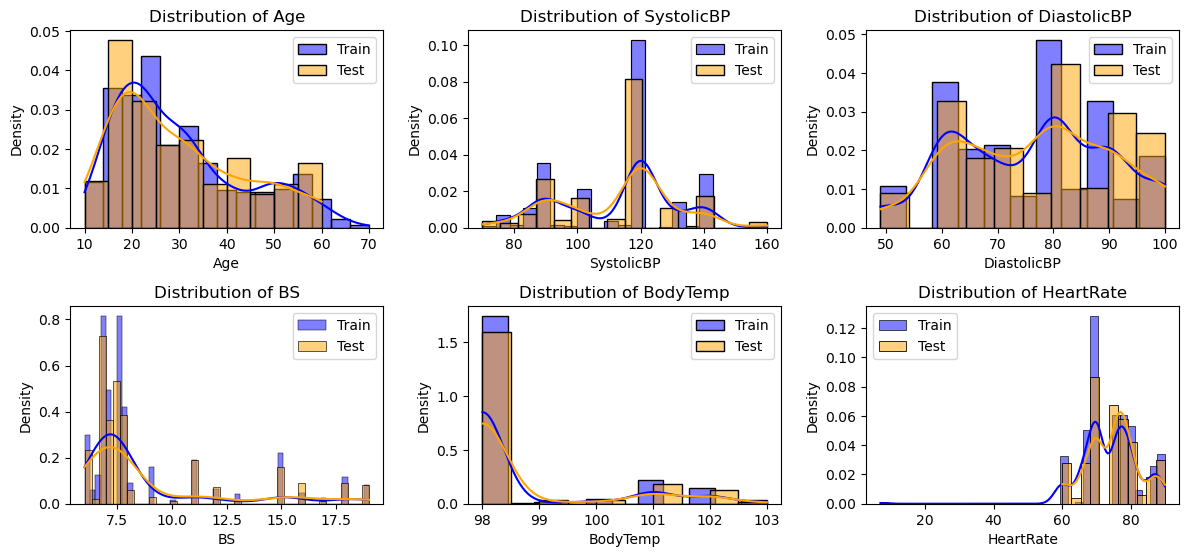

In [63]:
# Visualizations of Histograms for each feature to understand the distribution of training and test data
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
features = X_train.columns  # List of features

# Create subplots for histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_train[feature], color='blue', label='Train', kde=True, stat="density", alpha=0.5)
    sns.histplot(X_test[feature], color='orange', label='Test', kde=True, stat="density", alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

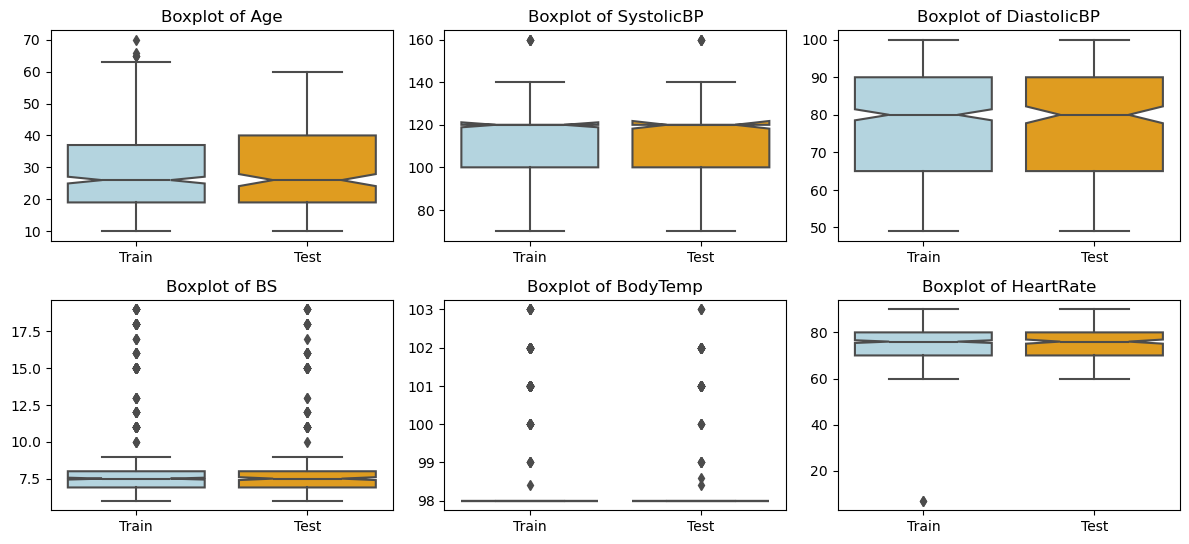

In [64]:
# Boxplots for training and test data to understand outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=[X_train[feature], X_test[feature]], palette=['lightblue', 'orange'], notch=True)
    plt.xticks([0, 1], ['Train', 'Test'])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

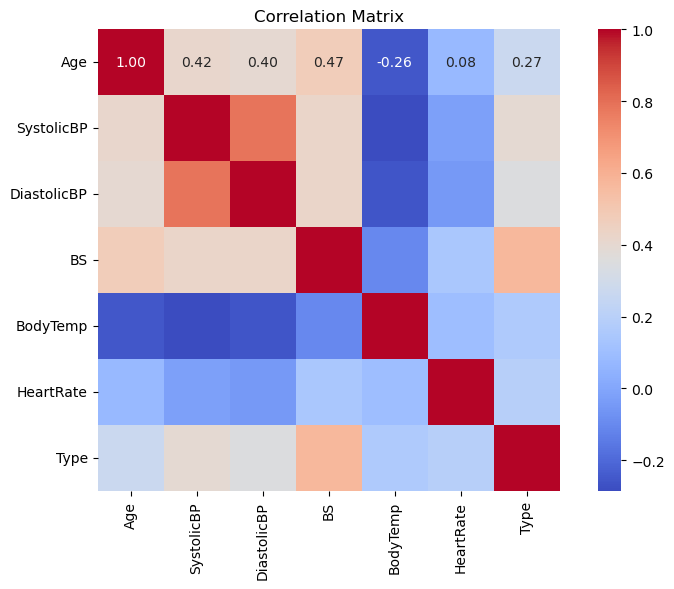

Correlation Matrix:
                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
Age          1.000000    0.416045     0.398026  0.473284 -0.255323   0.079798   
SystolicBP   0.416045    1.000000     0.787006  0.425172 -0.286616  -0.023108   
DiastolicBP  0.398026    0.787006     1.000000  0.423824 -0.257538  -0.046151   
BS           0.473284    0.425172     0.423824  1.000000 -0.103493   0.142867   
BodyTemp    -0.255323   -0.286616    -0.257538 -0.103493  1.000000   0.098771   
HeartRate    0.079798   -0.023108    -0.046151  0.142867  0.098771   1.000000   
Type         0.267225    0.396473     0.346649  0.569942  0.163984   0.194312   

                 Type  
Age          0.267225  
SystolicBP   0.396473  
DiastolicBP  0.346649  
BS           0.569942  
BodyTemp     0.163984  
HeartRate    0.194312  
Type         1.000000  


In [99]:
# Step 1: Calculate Correlation Coefficients
correlation_matrix = dataset.corr(method='pearson')  # You can also use 'spearman' or 'kendall'

# Step 2: Visualize Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Step 3: Interpret the Results
print("Correlation Matrix:")
print(correlation_matrix)

#### 2-b. Determine whether the dataset is imbalanced. Provide a brief explanation.

Class Distribution:
Type
1    406
2    336
3    272
Name: count, dtype: int64


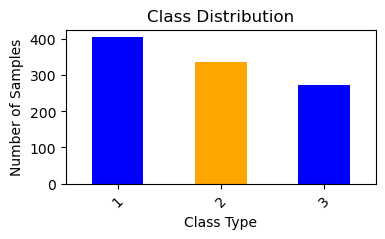


Total distribution difference: 0.09%


In [98]:
#Check for imbalance dataset
class_counts = dataset['Type'].value_counts()
print("Class Distribution:")
print(class_counts)
plt.figure(figsize=(4, 2))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Calculate the difference in distribution
diff = abs(train_dist - test_dist).sum() / 2
print(f"\nTotal distribution difference: {diff:.2f}%")


In [68]:
# Scale the features
scaler = StandardScaler()
X = dataset.drop(['Type'], axis=1)
X_scaled = scaler.fit_transform(X)


In [70]:
# store in a variable to measure the performance in the end
X_train_original = X_train.copy()
X_test_original = X_test.copy()

### 3. Algorithm Selection and Application 

In [71]:
# Create the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest_classifier.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


# Evaluate the model
print("\nRandom Forest Classifier Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')

Random Forest Report:
              precision    recall  f1-score   support

           1       0.78      0.83      0.80       122
           2       0.71      0.71      0.71       101
           3       0.92      0.84      0.88        82

    accuracy                           0.79       305
   macro avg       0.81      0.79      0.80       305
weighted avg       0.80      0.79      0.79       305


Random Forest Classifier Results:
[[101  20   1]
 [ 24  72   5]
 [  4   9  69]]
Accuracy: 0.7934


In [72]:
#Apply Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree = decision_tree_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
# Evaluate the model
print("Decision Tree Model Evaluation")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}')


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.82      0.81       122
           2       0.71      0.75      0.73       101
           3       0.96      0.84      0.90        82

    accuracy                           0.80       305
   macro avg       0.82      0.80      0.81       305
weighted avg       0.81      0.80      0.81       305

Decision Tree Model Evaluation
Confusion Matrix:
 [[100  22   0]
 [ 22  76   3]
 [  4   9  69]]
Accuracy: 0.8033


#### Hyperparameter Tuning 

In [102]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, 
                               cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Best parameters and score for Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Performance metrics for Random Forest
print("Random Forest Best Hyperparameters:", grid_search_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters for Random Forest: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Random Forest: 0.8067525721706122
Random Forest Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.7934426229508197
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.83      0.80       122
           2       0.71      0.71      0.71       101
           3       0.92      0.84      0.88        82

    accuracy                           0.79       305
   macro avg       0.81      0.79      0.80       305
weighted avg       0.80      0.79      0.79       305

Random Forest Confusion Matrix:
 [[101  20   1]
 [ 24  72   5]
 [  4   9  69]]


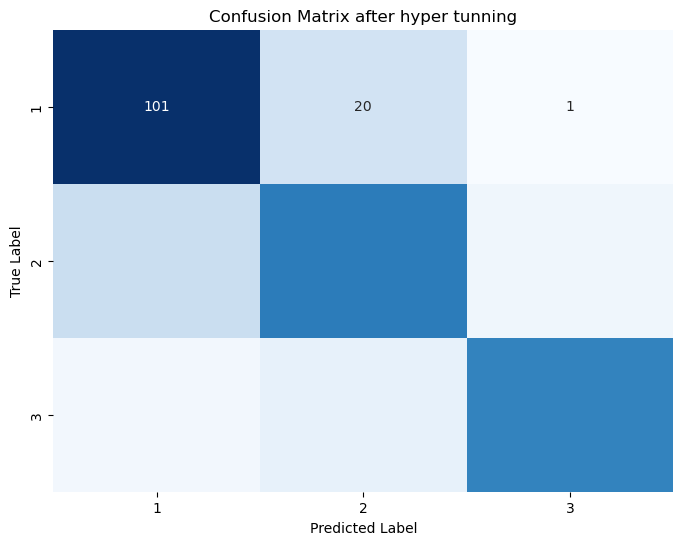

In [105]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Confusion Matrix after hyper tunning")

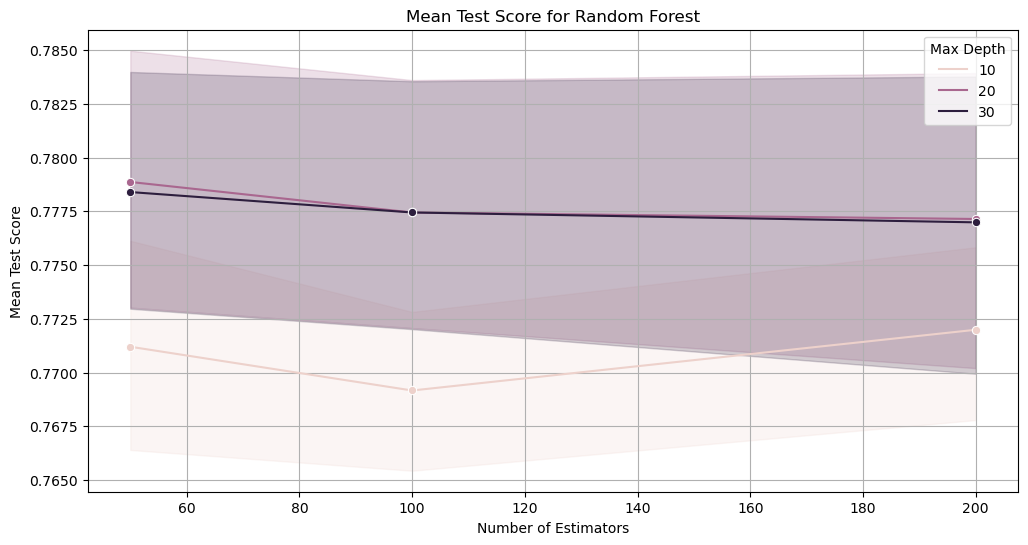

In [92]:
results = grid_search_rf.cv_results_

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')
plt.title('Mean Test Score for Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend(title='Max Depth')
plt.grid()
plt.show()

####  confusion matrix

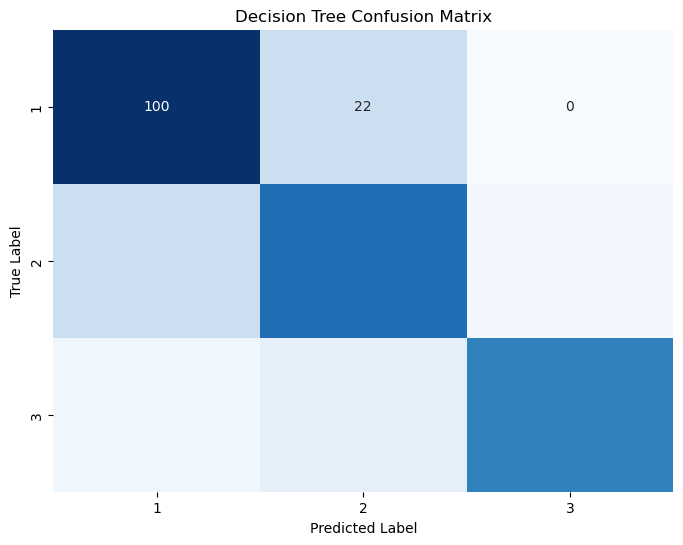

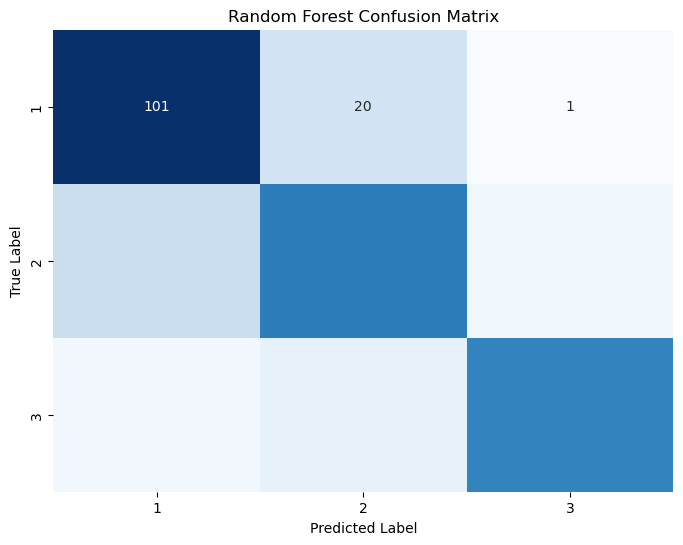

In [93]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, y_pred_tree), "Decision Tree Confusion Matrix")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest Confusion Matrix")

#### Classification report and Accuracy

In [94]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_tree)
dt_report = classification_report(y_test, y_pred_tree)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Print results
print(f'Accuracy of Decission tree: {accuracy_score(y_test, y_pred_tree):.4f}')
print("Decision Tree Classification Report:\n", dt_report)

print(f'Accuracy of random forest: {accuracy_score(y_test, y_pred_tree):.4f}')
print("Random Forest Classification Report:\n", rf_report)

Accuracy of Decission tree: 0.8033
Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.82      0.81       122
           2       0.71      0.75      0.73       101
           3       0.96      0.84      0.90        82

    accuracy                           0.80       305
   macro avg       0.82      0.80      0.81       305
weighted avg       0.81      0.80      0.81       305

Accuracy of random forest: 0.8033
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.83      0.80       122
           2       0.71      0.71      0.71       101
           3       0.92      0.84      0.88        82

    accuracy                           0.79       305
   macro avg       0.81      0.79      0.80       305
weighted avg       0.80      0.79      0.79       305

